In [299]:
#loading required packages
import pandas as pd
import numpy as np
import statistics
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import logging
import statsmodels.api as sm
import math
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
from pprint import pprint
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.INFO)

In [307]:
tempdata = pd.read_csv(r'data.csv')

In [318]:
tempdata['Value']

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
5           €93M
6           €67M
7           €80M
8           €51M
9           €68M
10          €77M
11        €76.5M
12          €44M
13          €60M
14          €63M
15          €89M
16        €83.5M
17          €78M
18          €58M
19        €53.5M
20        €51.5M
21          €60M
22          €38M
23        €64.5M
24          €27M
25          €81M
26        €69.5M
27        €59.5M
28        €69.5M
29          €62M
          ...   
18177       €70K
18178       €50K
18179       €50K
18180       €40K
18181       €50K
18182       €50K
18183         €0
18184       €40K
18185       €50K
18186       €60K
18187       €40K
18188       €60K
18189       €60K
18190       €60K
18191       €50K
18192       €50K
18193       €50K
18194       €50K
18195       €60K
18196       €60K
18197       €60K
18198       €60K
18199       €70K
18200       €60K
18201       €60K
18202       €60K
18203       €60K
18204       €6

In [ ]:
for i in range(0, len(tempdata)):
    #print(record)
    #tempdata.iloc[i]['Value'] = tempdata.iloc[i]['Value'].replace('€','')
    print(tempdata.iloc[i]['Value'])

# Loading Data and EDA

*Notice:* All records with NA values and irrelevant features are removed in R

In [2]:
data = pd.read_csv(r'data1.csv')

In [3]:
#descriptive statistics
data.head()

,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Preferred.Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,94,94,FC Barcelona,110500,Left,...,75,96,33,28,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,94,94,Juventus,77000,Right,...,85,95,28,31,23,7,11,15,14,11
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,92,93,Paris Saint-Germain,118500,Right,...,81,94,27,24,33,9,9,15,15,11
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,91,93,Manchester United,72000,Right,...,40,68,15,21,13,90,85,87,88,94
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,91,92,Manchester City,102000,Right,...,79,88,68,58,51,15,13,5,10,13


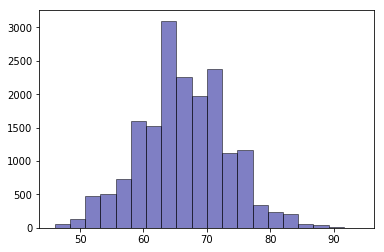

In [22]:
#histogram
bins = 20
n, bins, patches = plt.hist(data['Overall'], bins, color='darkblue', edgecolor = 'black', alpha=0.5)
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

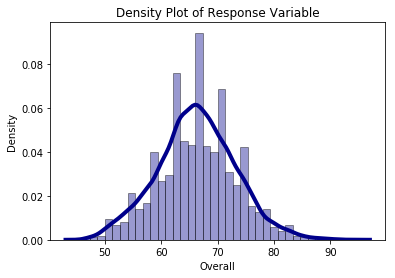

In [292]:
#density plot
density = sns.distplot(data['Overall'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
density.set_title("Density Plot of Response Variable")
density.set_ylabel('Density')

Score distribution is quite normal, there is no need to deal with the skewness.

In [51]:
#use 1 to represent 'good' and 0 to represent 'bad'
classification = []
median = statistics.median(data['Overall'])
for score in data['Overall']:
    if score<=median:
        classification.append(0)
    else:
        classification.append(1)
data['Class'] = classification

In [58]:
#create a new dataframe for modeling
model = data.drop(columns=['ID', 'Name','Photo','Preferred.Foot','Nationality','Overall','Potential','Club','Position','Jersey.Number'])

# Training Model

x: possible predictors for player class

y: player class (1 for good and 0 for bad)

training set & test set ratio is 8:2

## Checking Predictor Importance

In [138]:
model.corr().abs().unstack()['Class'].sort_values(ascending = False)[:10]

Class           1.000000
Reactions       0.678254
Composure       0.584773
Vision          0.405210
ShortPassing    0.396035
LongPassing     0.389126
Value           0.379917
Age             0.372608
ShotPower       0.366478
BallControl     0.361447
dtype: float64

In [139]:
#select 7 predictors with correlation over 0.36
x = X[['Reactions', 'Composure', 'Vision', 'ShortPassing', 'LongPassing', 'Value', 'Age']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


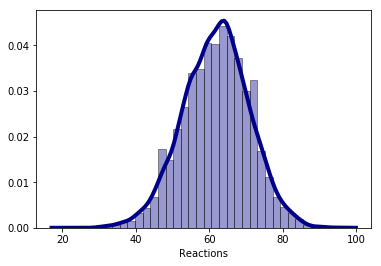

In [214]:
sns.distplot(data['Reactions'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Logistic Regression

In [301]:
#fit the model
glm = LogisticRegression()
logreg = glm.fit(x_train,y_train)
logreg.score(x,y)

#logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.INFO)
logging.info("R-Squared of logistic regression model is 0.894")

In [173]:
#model measurement and CCR
log_pre = logreg.predict(x_test)
log_confusion = confusion_matrix(y_test, log_pre)
print(log_confusion)
log_ccr = (log_confusion[0,0]+log_confusion[1,1])/sum(sum(log_confusion))
print(log_ccr)
log_mis = sum(log_pre!=y_test)/len(y_test)
print(log_mis)
#logging.info("CCR logistic regression model is".format(log_ccr))

[[1732  116]
 [ 164 1570]]
0.9218313791178113
0.07816862088218872


## Random Forest

### Tuning Parameters

In [186]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state = 42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

In [219]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [243]:
#fit the model
rf = RandomForestClassifier(n_estimators = 1400, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', 
                            max_depth = 80, bootstrap = False, random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=80, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [244]:
#model measurement and CCR
rf_pre = rf.predict(x_test)
rf_confusion = confusion_matrix(y_test, rf_pre)
print(rf_confusion)
rf_ccr = (rf_confusion[0,0]+rf_confusion[1,1])/sum(sum(rf_confusion))
rf_mis = sum(rf_pre!=y_test)/len(y_test)
print(rf_ccr)
print(rf_mis)

#logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.INFO)
#logging.info("RMSE of random forest is 7882.749")

[[1789   59]
 [  61 1673]]
0.966499162479062
0.03350083752093802


In [285]:
#importance variables of random forest
importances = list(rf.feature_importances_)
variable_name = list(x.columns)
variable_importance = pd.DataFrame({'Variable':variable_name,'Importance':importances})
variable_importance = variable_importance.sort_values(by=['Importance'], ascending=False)
variable_importance
#logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.INFO)
#logging.info("Value, Reactions and Composure are most important variables")

,Variable,Importance
5,Value,0.450641
0,Reactions,0.200616
1,Composure,0.108529
6,Age,0.097120
3,ShortPassing,0.065737
2,Vision,0.044345
4,LongPassing,0.033013


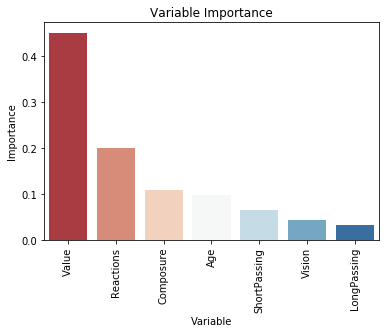

In [306]:
bar = sns.barplot(x = 'Variable', y = 'Importance', data = variable_importance, palette = 'RdBu')
bar.set_title('Variable Importance')
for item in bar.get_xticklabels():
    item.set_rotation(90)

## Decision Tree

### Tuning Parameters

In [187]:
dt = DecisionTreeClassifier(criterion = "gini", random_state = 100)

In [188]:
pprint(dt.get_params())

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 100,
 'splitter': 'best'}


In [247]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(start = 1, stop = 7, num = 7)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
max_leaf_nodes = [2,3,5]
max_leaf_nodes.append(None)
presort = [True, False]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
criterion = ["gini", "entropy"]
decision_grid = {#'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'criterion': criterion, 
                'max_leaf_nodes': max_leaf_nodes, 
                'presort': presort}
pprint(decision_grid)

{'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [1, 2, 3, 4, 5, 6, 7],
 'max_leaf_nodes': [2, 3, 5, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'presort': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeClassifier()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = decision_grid, n_iter = 100, cv = 10, verbose=2, random_state = 42, n_jobs = -1)
# Fit the random search model
dt_random.fit(x_train, y_train)

In [249]:
dt_random.best_params_

{'presort': False,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_leaf_nodes': None,
 'max_features': 7,
 'max_depth': 90,
 'criterion': 'entropy'}

In [250]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=90, min_samples_leaf=4, min_samples_split=10, max_features=7,
                            presort=False,max_leaf_nodes=None)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=90,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [251]:
#model measurement and CCR
dt_pre = dt.predict(x_test)
dt_confusion = confusion_matrix(y_test, dt_pre)
print(dt_confusion)
dt_ccr = (dt_confusion[0,0]+dt_confusion[1,1])/sum(sum(dt_confusion))
dt_mis = sum(dt_pre!=y_test)/len(y_test)
print(dt_ccr)
print(dt_mis)

[[1807   41]
 [  61 1673]]
0.9715242881072027
0.02847571189279732


### Visualizing the Tree

In [303]:
#visualization of tree
export_graphviz(dt, out_file='tree1.dot', feature_names = x.columns,
                class_names = ['bad','good'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [304]:
# run in command line:
! dot -Tpng tree1.dot -o tree.png

/bin/sh: dot: command not found


## K Nearest Neighbors

In [190]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

In [213]:
error = np.array(error)
best_k = np.where(error == np.min(error))[0][0]+1
print(best_k)
knn_mis = np.min(error)
print(knn_mis)

7
0.06197654941373534


## Neural Network

In [295]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [296]:
clf_pre = clf.predict(x_test)
clf_mis = sum(clf_pre!=y_test)/len(y_test)
clf_mis

0.11166945840312674

## Comparison

In [297]:
model_name = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'K Nearest Neighbors', 'Neural Network']
model_performance = [log_mis, rf_mis, dt_mis, knn_mis, clf_mis]
total = pd.DataFrame({'Name':model_name, 
                      'Misclassification Rate': model_performance})
total = total.sort_values(by = 'Misclassification Rate') 

In [298]:
total
#the best model is decision tree

,Name,Misclassification Rate
2,Decision Tree,0.028476
1,Random Forest,0.033501
3,K Nearest Neighbors,0.061977
0,Logistic Regression,0.078169
4,Neural Network,0.111669
